<a href="https://colab.research.google.com/github/ramonferrari/mpgc_ti/blob/main/BDADS_2S2023_Tarefa_Aulas_5_e_6_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa Aulas 5 e 6
# Exploração de Cluster Analysis
#### Grupo:
1.   Antonio Angelo dos Santos
2. Gabriel Menegon Cardozo
3. Gustavo Salomão
4. Lucas Felipe Ballesteros Martins
5. Ramon Moreno Ferrari
6. Valter Bellei



### Preparação: instala e carrega pacotes necessários

In [1]:
install.packages("ggplot2")
install.packages("ggdendro")
install.packages("stringr")
install.packages("patchwork")
install.packages("gridExtra")
install.packages("showtext")
install.packages("dendextend")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘viridis’




In [2]:
suppressWarnings(suppressMessages(library(ggplot2)))
suppressWarnings(suppressMessages(library(ggdendro)))
suppressWarnings(suppressMessages(library(stringr)))
suppressWarnings(suppressMessages(library(patchwork)))
suppressWarnings(suppressMessages(library(gridExtra)))
suppressWarnings(suppressMessages(library(showtext)))
suppressWarnings(suppressMessages(library(dendextend)))

## Exploração de Cluster Analysis

In [3]:
# Endereço do arquivo na nuvem, para funcionar para todos os colegas, em qualquer computador
url_dataset <- c("https://raw.githubusercontent.com/ramonferrari/mpgc_ti/main/Sanduiches.csv")

In [4]:
# Leitura dos dados
sanduiches <- read.table(url_dataset,header=TRUE,sep = ",")

# Deixa variáveis com nomes bonitinhos porque temos TOC
names(sanduiches) <- sub("\\.", " ", names(sanduiches))
sanduiches$`Sanduíches` <- str_to_title(sanduiches$`Sanduíches`)
# exceto o CBO que é maiúsculo mesmo
sanduiches$`Sanduíches` <- replace(sanduiches$`Sanduíches`, sanduiches$`Sanduíches`=="Cbo", "CBO")

# Dataset lido corretamente?
head(sanduiches)
tail(sanduiches)

,Sanduíches,Valor Energético,Carboidratos,Proteínas,Gordura Total,Gordura Saturada,Gordura Trans,Colesterol,Fibra Alimentar,Sódio,Cálcio,Ferro
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
1,Big Mac,491,40,26,26,9.7,1.1,60,3.8,813,186,5.6
2,Big Tasty,839,42,43,56,23.0,1.7,109,3.8,1474,343,7.0
3,Quarterão,533,35,32,30,14.0,1.3,88,2.7,1061,243,5.3
4,Mcnífico Bacon,592,37,32,32,13.0,1.2,85,2.4,985,166,5.9
5,Cheddar Mcmelt,481,29,29,28,13.0,1.1,80,2.9,820,153,5.3
6,Mcfish,362,37,17,16,4.4,0.3,40,2.8,558,154,3.5


,Sanduíches,Valor Energético,Carboidratos,Proteínas,Gordura Total,Gordura Saturada,Gordura Trans,Colesterol,Fibra Alimentar,Sódio,Cálcio,Ferro
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
15,Chicken Bacon Grill,425,31,39,16.0,5.0,0.4,83,3,1151,161,3.9
16,Cheeseburger,295,30,16,13.0,5.8,0.7,35,2,639,149,3.6
17,Hamburger,245,29,13,8.6,3.3,0.5,24,2,434,69,3.6
18,Angus Bacon,861,57,54,46.0,21.0,1.7,145,5,1917,193,4.0
19,Angus Deluxe,863,56,51,49.0,21.0,1.7,139,5,1716,197,3.8
20,CBO,643,56,27,35.0,11.0,0.7,71,4,1220,236,6.9


In [5]:
#coloca variavel "nome do sanduiche" como rownames
row.names(sanduiches)<-sanduiches$`Sanduíches`
sanduiches <- sanduiches[,2:12]

head(sanduiches)

,Valor Energético,Carboidratos,Proteínas,Gordura Total,Gordura Saturada,Gordura Trans,Colesterol,Fibra Alimentar,Sódio,Cálcio,Ferro
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
Big Mac,491,40,26,26,9.7,1.1,60,3.8,813,186,5.6
Big Tasty,839,42,43,56,23.0,1.7,109,3.8,1474,343,7.0
Quarterão,533,35,32,30,14.0,1.3,88,2.7,1061,243,5.3
Mcnífico Bacon,592,37,32,32,13.0,1.2,85,2.4,985,166,5.9
Cheddar Mcmelt,481,29,29,28,13.0,1.1,80,2.9,820,153,5.3
Mcfish,362,37,17,16,4.4,0.3,40,2.8,558,154,3.5


In [6]:
font_add_google("Merriweather Sans", "merri")

png 
  2

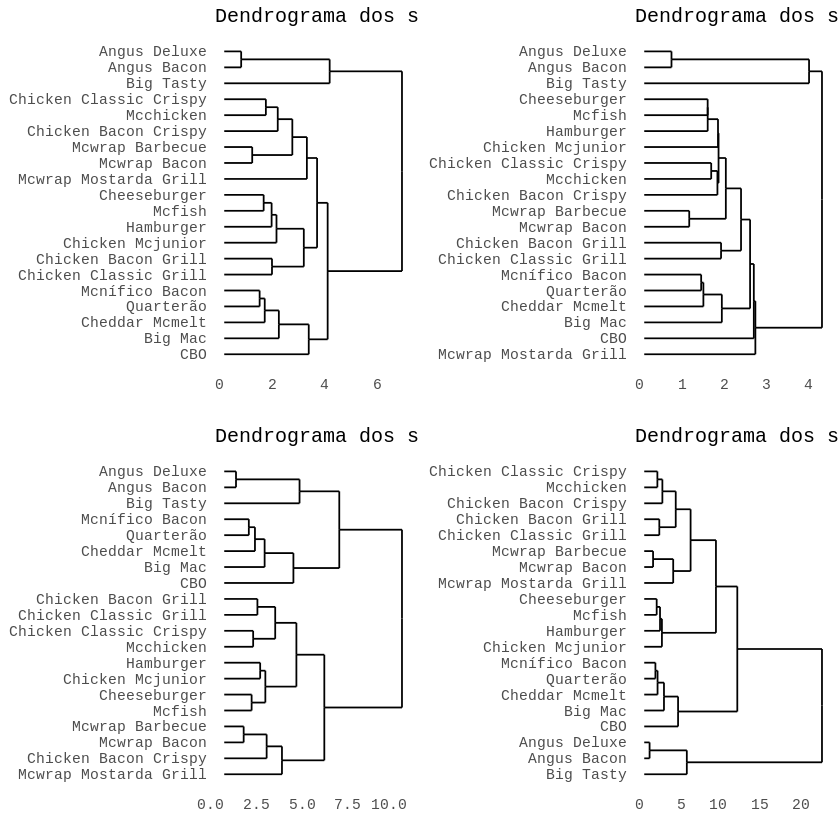

In [7]:
# Implementa o algoritmo hierárquico e apresenta o dendrograma

# Normaliza o dataset!
sanduiches_pre_scale <- sanduiches
sanduiches <- scale(sanduiches)

# Plot 4x4
for (i in 1:4) {assign(as.vector(paste0('grafico', i)),vector())}

# Cria loop para fazer os gráficos
layouts <- c("average","single","complete","ward.D")
names(layouts) <- c(1:4)

for (i in 1:length(layouts)) {

  hc <- hclust(dist(sanduiches), layouts[i])
  p <- ggdendrogram(hc, rotate=FALSE)
  titulo <- paste("Dendrograma dos sanduíches - método",layouts[i])
  assign(paste0("grafico0", i), ggdendrogram(hc, rotate=TRUE)+ labs(title=titulo)+ theme(plot.title = element_text(size=12),text=element_text(family="merri")))

  theme(text=element_text(family="Times New Roman", face="bold", size=16))
  }

grid.arrange(grafico01, grafico02, grafico03, grafico04, ncol=2)

pdf("dendogramas.pdf", width = 13, height = 9)
showtext_auto()
grid.arrange(grafico01, grafico02, grafico03, grafico04, ncol=2)
dev.off()

In [8]:
# Podando a árvore em 5 grupos
hc <- hclust(dist(sanduiches), "average")
dend <- as.dendrogram(hc,rotate=TRUE)

grupos <- cutree(hc,k=5)
grupos

dend <- color_labels(dend, k = 5)


Big Mac              Big Tasty              Quarterão 
                     1                      2                      1 
        Mcnífico Bacon         Cheddar Mcmelt                 Mcfish 
                     1                      1                      3 
             Mcchicken           Mcwrap Bacon        Mcwrap Barbecue 
                     4                      4                      4 
 Mcwrap Mostarda Grill       Chicken Mcjunior Chicken Classic Crispy 
                     4                      3                      4 
 Chicken Classic Grill   Chicken Bacon Crispy    Chicken Bacon Grill 
                     3                      4                      3 
          Cheeseburger              Hamburger            Angus Bacon 
                     3                      3                      5 
          Angus Deluxe                    CBO 
                     5                      1

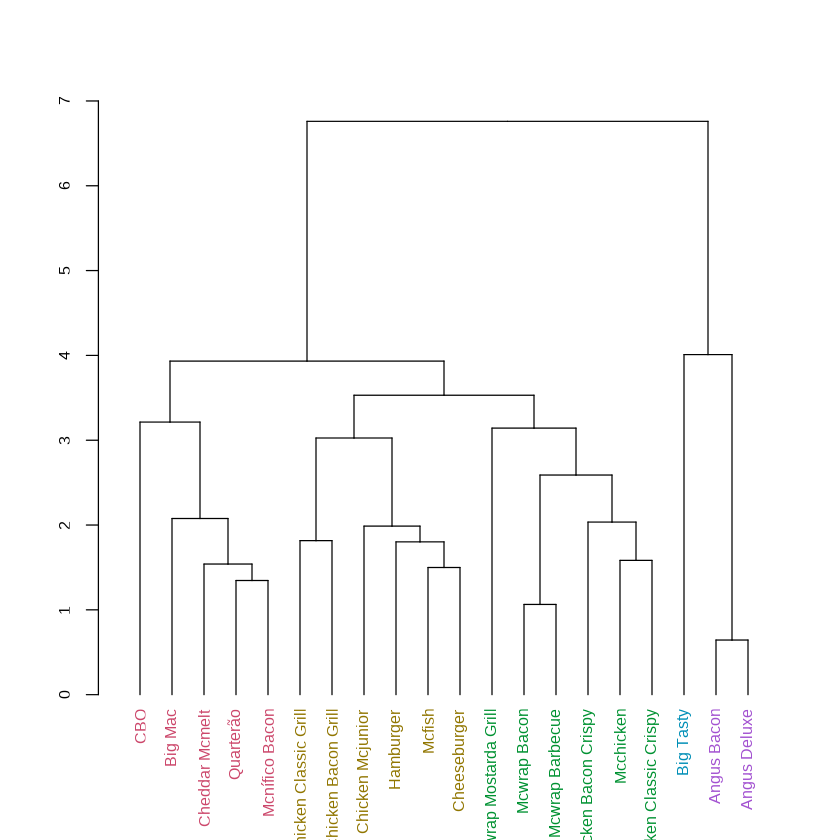

In [9]:
plot(dend)

## Desafio
Cluster analysis para exemplo da tabela da rede Two Mode

In [10]:
# Endereço do arquivo na nuvem, para funcionar para todos os colegas, em qualquer computador
url_dataset <- c("https://raw.githubusercontent.com/ramonferrari/mpgc_ti/main/Rede%20Two%20Mode_Tarefa%20Aulas%205%20e%206.csv")

In [11]:
# Leitura dos dados
compras <- read.table(url_dataset,header=TRUE,sep = ",")
# Dataset lido corretamente?
head(compras)
names(compras)

,Pessoas,iPhone,iPad,Livro.Harry.Potter,jogo.MineCraft,Camisa.do.Corinthians,Bola.de.Futebol,Flauta.Transversal,Lista.Telefônica,Caixa.de.Fósforos,Calculadora,Detergente,Agenda,Cachorro,Pokemon,Álcool.Gel
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,João,1,1,0,1,1,0,1,1,1,1,0,0,0,1,1
2,Maria,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
3,José,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1
4,Paulo,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1
5,Pedro,0,0,1,0,1,1,0,1,1,1,0,0,0,0,1
6,Luisa,0,0,1,0,1,1,0,1,1,1,0,0,1,0,1


[1] "Pessoas"               "iPhone"                "iPad"                 
 [4] "Livro.Harry.Potter"    "jogo.MineCraft"        "Camisa.do.Corinthians"
 [7] "Bola.de.Futebol"       "Flauta.Transversal"    "Lista.Telefônica"     
[10] "Caixa.de.Fósforos"     "Calculadora"           "Detergente"           
[13] "Agenda"                "Cachorro"              "Pokemon"              
[16] "Álcool.Gel"

In [12]:
#coloca variavel "nome" como rownames
row.names(compras)<-compras$`Pessoas`
compras <- compras[,2:16]

head(compras)

,iPhone,iPad,Livro.Harry.Potter,jogo.MineCraft,Camisa.do.Corinthians,Bola.de.Futebol,Flauta.Transversal,Lista.Telefônica,Caixa.de.Fósforos,Calculadora,Detergente,Agenda,Cachorro,Pokemon,Álcool.Gel
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
João,1,1,0,1,1,0,1,1,1,1,0,0,0,1,1
Maria,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
José,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1
Paulo,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1
Pedro,0,0,1,0,1,1,0,1,1,1,0,0,0,0,1
Luisa,0,0,1,0,1,1,0,1,1,1,0,0,1,0,1


png 
  2

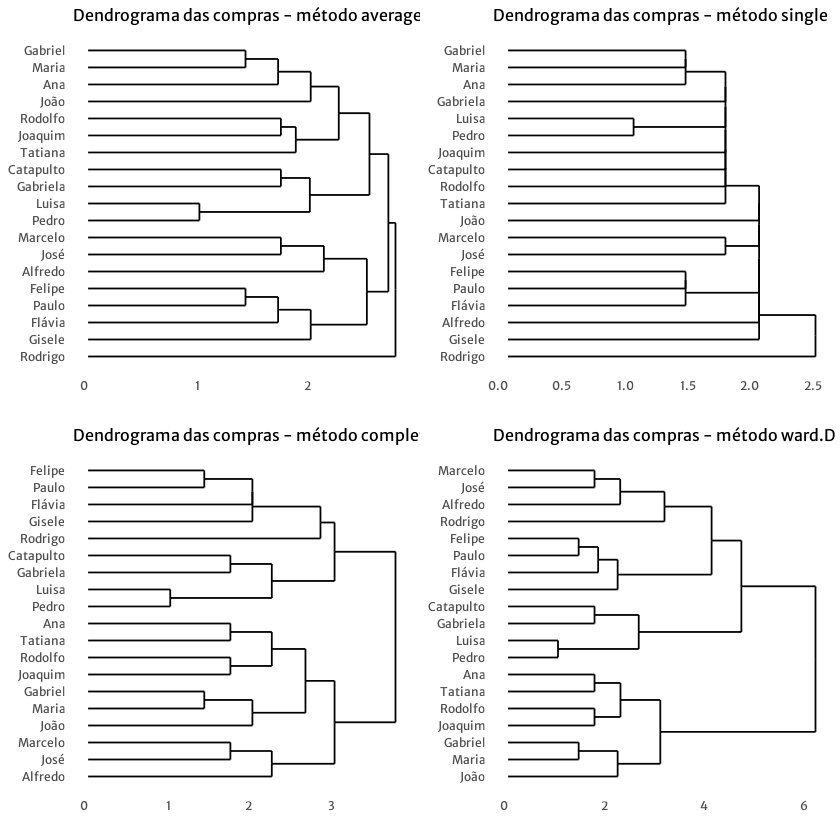

In [13]:
# Implementa o algoritmo hierárquico e apresenta o dendrograma

# Dataset já normalizado!

# Plot 4x4
for (i in 1:4) {assign(as.vector(paste0('grafico', i)),vector())}

# Cria loop para fazer os gráficos
layouts <- c("average","single","complete","ward.D")
names(layouts) <- c(1:4)

for (i in 1:length(layouts)) {

  hc <- hclust(dist(compras), layouts[i])
  p <- ggdendrogram(hc, rotate=FALSE)
  titulo <- paste("Dendrograma das compras - método",layouts[i])
  assign(paste0("grafico0", i), ggdendrogram(hc, rotate=TRUE)+ labs(title=titulo)+ theme(plot.title = element_text(size=12),text=element_text(family="merri")))

  theme(text=element_text(family="merri", face="bold", size=16))
  }

grid.arrange(grafico01, grafico02, grafico03, grafico04, ncol=2)

pdf("dendograma-compras.pdf", width = 13, height = 9)
showtext_auto()
grid.arrange(grafico01, grafico02, grafico03, grafico04, ncol=2)
dev.off()

In [14]:
# Podando a árvore em 6 grupos
hc <- hclust(dist(compras), "complete")
dend <- as.dendrogram(hc,rotate=TRUE)

grupos <- cutree(hc,k=6)
grupos

dend <- color_labels(dend, k = 6)

João     Maria      José     Paulo     Pedro     Luisa   Marcelo   Alfredo 
        1         1         2         3         4         4         2         2 
  Joaquim  Gabriela    Flávia Catapulto   Rodrigo   Gabriel   Rodolfo    Felipe 
        5         4         3         4         6         1         5         3 
   Gisele   Tatiana       Ana 
        3         5         5

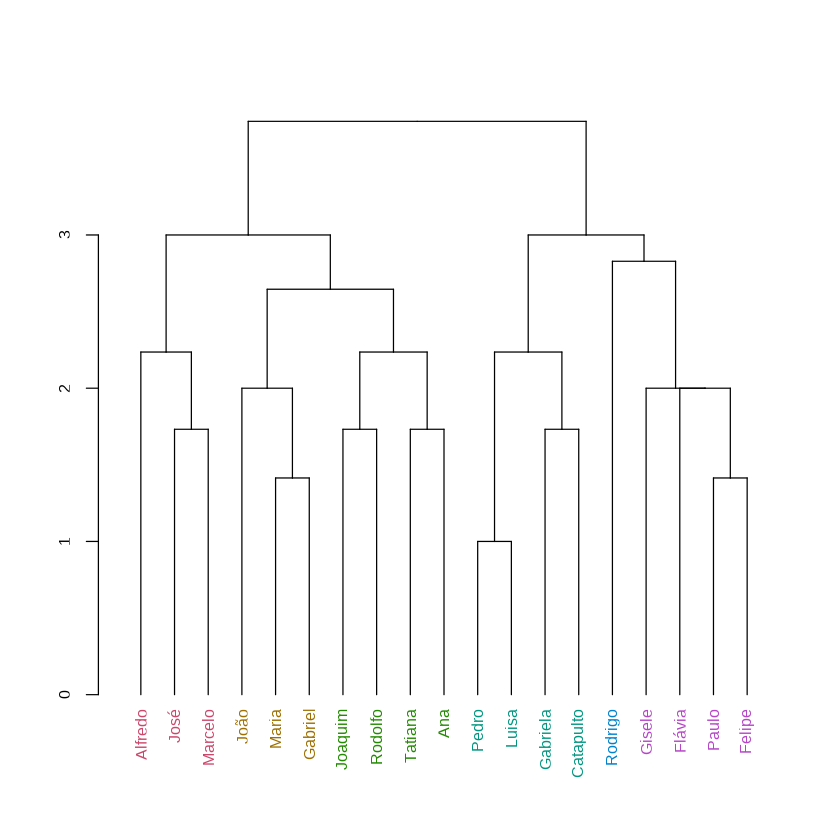

In [15]:
plot(dend)